# Q1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary=pd.read_csv("Salary_Data.csv")

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Hemanth H L\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

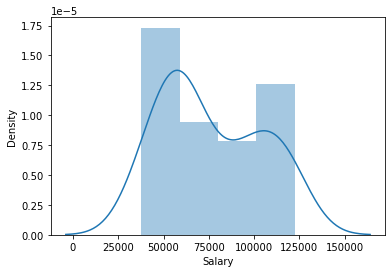

In [6]:
sns.distplot(salary['Salary'])

C:\Users\Hemanth H L\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

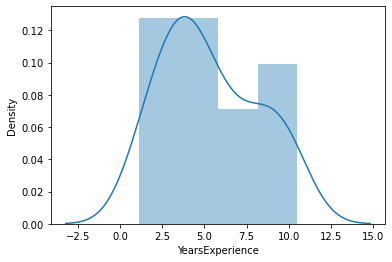

In [7]:
sns.distplot(salary['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

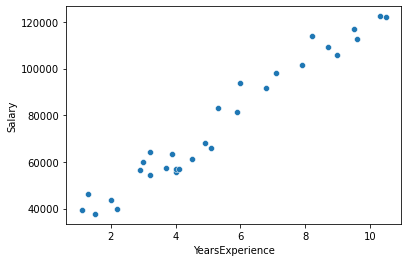

In [8]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salary)

In [9]:
import statsmodels.formula.api as smf
model1=smf.ols('YearsExperience~YearsExperience',data=salary).fit()
model1.params
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.14e-20
Time:                        20:28:40   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model1.conf_int(0.05)

,0,1
Intercept,-3.053603,-1.712718
Salary,0.000093,0.000110


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

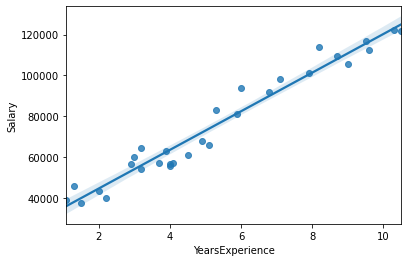

In [11]:
sns.regplot(x='YearsExperience',y='Salary',data=salary) 

In [12]:
salary.isnull().head().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
salary.dropna().tail().sum()

YearsExperience        48.9
Salary             579449.0
dtype: float64

In [14]:
print(model1.pvalues,     
      model1.tvalues)

Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64 Intercept    -7.281283
Salary       24.950094
dtype: float64


In [15]:
model1.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [16]:
print(model1.rsquared,
      model1.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [17]:
prediction=model1.predict(salary.iloc[:,1])
print(prediction)

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=np.array([salary["YearsExperience"]]).reshape(-1,1)
y = np.array([salary["Salary"]]).reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train

array([[ 4. ],
       [ 8.7],
       [ 8.2],
       [ 3. ],
       [ 2. ],
       [ 5.1],
       [ 9. ],
       [ 3.9],
       [ 1.1],
       [ 9.5],
       [ 4.9],
       [ 5.9],
       [ 4.5],
       [ 3.2],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 1.5],
       [ 9.6],
       [ 7.1],
       [ 4.1],
       [10.3]])

In [19]:
y_train

array([[ 55794.],
       [109431.],
       [113812.],
       [ 60150.],
       [ 43525.],
       [ 66029.],
       [105582.],
       [ 63218.],
       [ 39343.],
       [116969.],
       [ 67938.],
       [ 81363.],
       [ 61111.],
       [ 64445.],
       [101302.],
       [ 56957.],
       [ 56642.],
       [ 37731.],
       [112635.],
       [ 98273.],
       [ 57081.],
       [122391.]])

In [20]:
model2=LinearRegression().fit(x_train,y_train)
model2.score(x_test,y_test)*100 
x_test

array([[ 2.2],
       [ 3.7],
       [ 6. ],
       [ 6.8],
       [ 3.2],
       [ 1.3],
       [10.5],
       [ 5.3]])

In [21]:
y_test

array([[ 39891.],
       [ 57189.],
       [ 93940.],
       [ 91738.],
       [ 54445.],
       [ 46205.],
       [121872.],
       [ 83088.]])

In [22]:
y_pred= model2.predict(x_test)#Predict the model
print(y_pred)

[[ 45760.78432606]
 [ 60031.29984328]
 [ 81912.75696969]
 [ 89523.69857888]
 [ 55274.46133754]
 [ 37198.47501573]
 [124724.30352136]
 [ 75253.18306165]]


Text(0, 0.5, 'Salary')

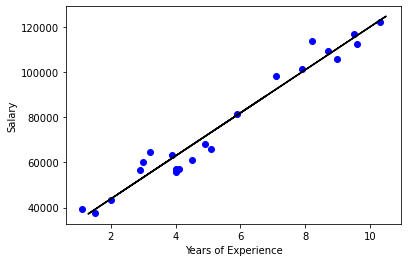

In [23]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,y_pred,color='k')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

# Q2

In [35]:
Delivery_Time_Df = pd.read_csv('delivery_time.csv')
Delivery_Time_Df.head()


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [36]:
Delivery_Time_Df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

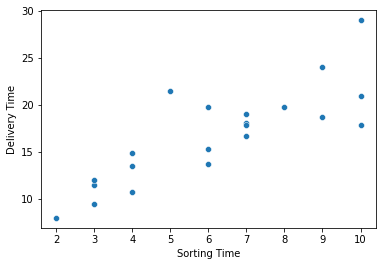

In [37]:
sns.scatterplot(y='Delivery Time',x='Sorting Time',data=Delivery_Time_Df)

In [38]:
Delivery_Time_Df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [39]:
import statsmodels.formula.api as smf

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

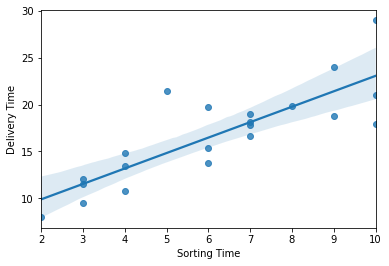

In [40]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=Delivery_Time_Df) 

In [41]:
Delivery_Time_Df.isnull().head()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [42]:
Delivery_Time_Df.dropna().tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [32]:
!pip install scipy

In [43]:
import statsmodels.formula.api as smf

In [56]:
Delivery_Time_Df=Delivery_Time_Df.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)
Delivery_Time_Df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [57]:
linear_model=smf.ols("ST~DT",data=Delivery_Time_Df).fit()
linear_model.params
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 30 May 2021   Prob (F-statistic):           3.98e-06
Time:                        20:36:46   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
linear_model.conf_int(0.05)

,0,1
Intercept,-3.130058,1.616712
DT,0.278169,0.549318


In [59]:
prediction =linear_model.predict(Delivery_Time_Df.iloc[:,0])
print(prediction)

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64


In [61]:
x=np.array([Delivery_Time_Df["ST"]]).reshape(-1,1)
y=np.array([Delivery_Time_Df["DT"]]).reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

x_train

array([[ 9],
       [ 3],
       [ 4],
       [ 7],
       [10],
       [ 3],
       [10],
       [ 6],
       [ 9],
       [ 8],
       [ 4],
       [10],
       [ 7],
       [ 5],
       [ 6]], dtype=int64)

In [62]:
y_train

array([[24.  ],
       [ 9.5 ],
       [14.88],
       [19.  ],
       [21.  ],
       [12.03],
       [17.9 ],
       [13.75],
       [18.75],
       [19.83],
       [10.75],
       [29.  ],
       [17.83],
       [21.5 ],
       [19.75]])

In [63]:
model22=LinearRegression().fit(x_train,y_train)
model22.score(x_test,y_test)*100

81.83036359658935

In [64]:
print('--------X Test---------- \n',x_test)
print('\n--------Y Test ---------\n',y_test)

--------X Test---------- 
 [[2]
 [4]
 [6]
 [3]
 [7]
 [7]]

--------Y Test ---------
 [[ 8.  ]
 [13.5 ]
 [15.35]
 [11.5 ]
 [16.68]
 [18.11]]


In [65]:
y_pred=model22.predict(x_test)
print(y_pred)

[[10.6055132 ]
 [13.71501466]
 [16.82451613]
 [12.16026393]
 [18.37926686]
 [18.37926686]]


<function matplotlib.pyplot.show(close=None, block=None)>

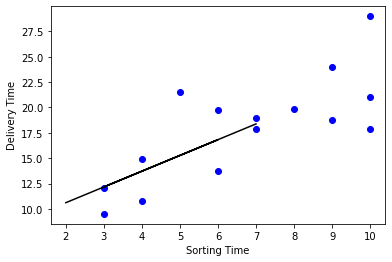

In [66]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,y_pred,color='k')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show